# Least squares fitting: basics

Let's start by implementing a simple least squares fit using analytical expressions.

Plot the data provided below. Calculate the least squares estimate for the slope  𝑎  and intercept  𝑏  ( 𝑦=𝑎𝑥+𝑏 ) and add the corresponding line to your plot.

1.8982726731203012
1.261222194571428


Text(0, 0.5, 'y')

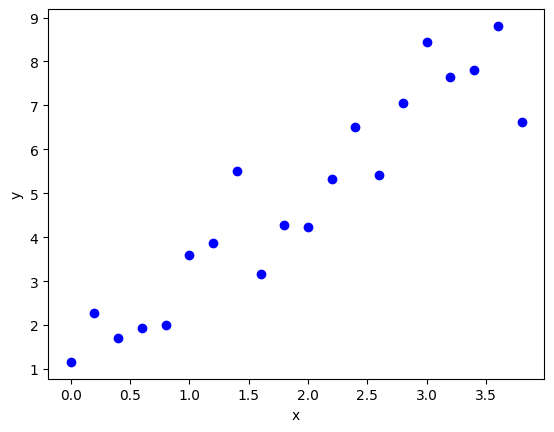

In [ ]:
import numpy
import pylab

xarray = numpy.arange(20.)/5
#datai = 2.*xarray+1.+numpy.random.normal(size=(20))
#print(datai)

yarray = numpy.array([1.16100793, 2.27070892+8.*0., 1.7102285 , 1.92216664 ,2.00306275 ,3.60437835,
 3.8682993 , 5.51139028, 3.16760897, 4.27715062, 4.22776111, 5.33520844,
 6.50611469, 5.4146256,  7.04786637, 8.44454962, 7.63848438, 7.81296952,
 8.80991074 ,6.62531274])#+numpy.random.normal(size=(20))*0.3

ybar = numpy.mean(yarray)
xbar = numpy.mean(xarray)
deltaX = xarray-xbar
deltaY = yarray-ybar

aHat = numpy.sum(deltaX*deltaY)/numpy.sum(deltaX*deltaX)
print(aHat)


bHat = ybar - aHat*xbar
print(bHat)

pylab.plot(xarray,yarray,'bo')
#pylab.plot(xarray,aHat*xarray+bHat)
pylab.xlabel('x')
pylab.ylabel('y')





Now recompute the least-squares slope $a$ and intercept $b$ by numerically minimizing/optimizing the least squares loss function $\sum_i (y(x_i)-f(x_i,a,b))^2$. You may wish to use the numerical opimization routine included below. Do you find the same result as in the analytical calculation? Replot the data along with the best fit line you have derived.

Repeat your optimization but with an L1 loss function and add the corresponding line to your plot.


112.79239956389831
[1.89827266 1.26122221]
[2.02548714 1.0530815 ]


Text(0, 0.5, 'y')

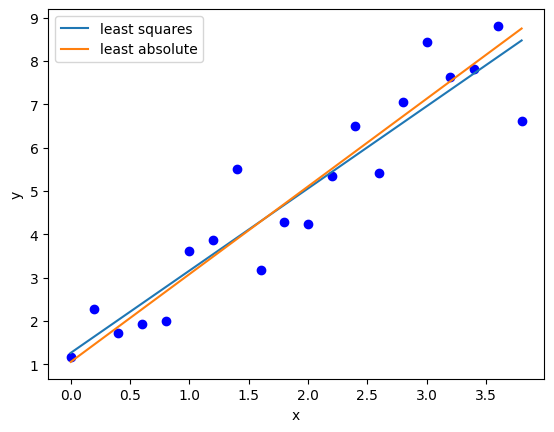

In [ ]:
def f(x,m,c):
  f = m*x+c
  return f

def loss(coeff,xarray,yarray):
  loss = numpy.sum((yarray-f(xarray,coeff[0],coeff[1]))**2.)
  return loss


def lossAbs(coeff,xarray,yarray):
  lossAbs = numpy.sum(numpy.abs(yarray-f(xarray,coeff[0],coeff[1])))
  return lossAbs


print(loss([1.,1.],xarray,yarray))

from scipy.optimize import minimize

start = [1.,1.]

minimum = minimize(loss,x0=start,args=(xarray,yarray),method='BFGS')
print(minimum.x)

minimumAbs = minimize(lossAbs,x0=start,args=(xarray,yarray),method='BFGS')
print(minimumAbs.x)


pylab.plot(xarray,yarray,'bo')
pylab.plot(xarray,minimum.x[0]*xarray+minimum.x[1],label='least squares')
pylab.plot(xarray,minimumAbs.x[0]*xarray+minimumAbs.x[1],label='least absolute')
pylab.legend()
pylab.xlabel('x')
pylab.ylabel('y')



#old112.79239956389831
#[1.89827266 1.26122221]
#[2.02548714 1.0530815 ] next steps - - varying errors - more  fit a + bx + cx^2




# Least squares: more parameters

Now consider a new data vector, provided below, which contains an oscillatory feature with a known period and phase. Plot the new data. Using L2/least squares optimization and assuming the model function  𝑓=𝑎𝑥+𝑏+𝑐sin(5𝑥) , find the best fit three parameter model (described by the parameters  𝑎,𝑏,𝑐 .)

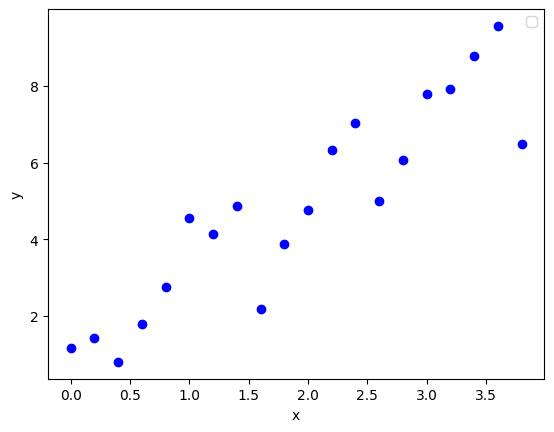

[1.         2.04147098 2.30929743 1.74112001 1.0431975  1.04107573
 1.9205845  3.0569866  3.58935825 3.21211849 2.45597889 2.20000979
 2.86342708 4.02016704 4.79060736 4.65028784 3.91209668 3.43860251
 3.84901275 4.94987721]
160.54393400910683
[ 1.9024595   1.25312257 -0.96607972]


Text(0, 0.5, 'y')

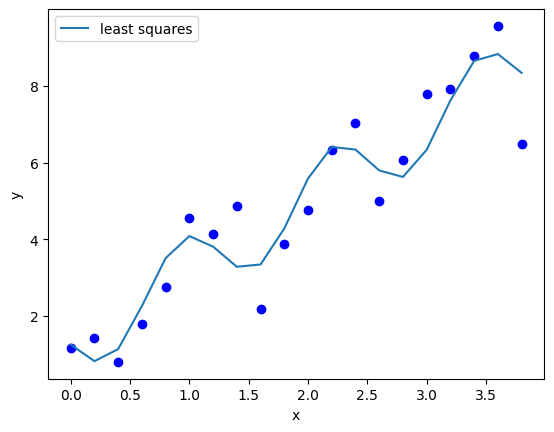

In [ ]:

#### now lets have a sinusoidal oscillation



yarray = numpy.array([1.16100793, 2.27070892+8.*0., 1.7102285 , 1.92216664 ,2.00306275 ,3.60437835,
 3.8682993 , 5.51139028, 3.16760897, 4.27715062, 4.22776111, 5.33520844,
 6.50611469, 5.4146256,  7.04786637, 8.44454962, 7.63848438, 7.81296952,
 8.80991074 ,6.62531274])-1.*numpy.sin(5.*xarray)#+numpy.random.normal(size=(20))*0.3

def f2(x,m,c,s):
  f2 = m*x+c+s*numpy.sin(5.*x)
  return f2

def loss2(coeff,xarray,yarray):
  loss2 = numpy.sum((yarray-f2(xarray,coeff[0],coeff[1],coeff[2]))**2.)
  return loss2

pylab.plot(xarray,yarray,'bo')
#pylab.plot(xarray,minimum.x[0]*xarray+minimum.x[1]+minimum.x[2]*numpy.sin(3.*xarray),label='least squares')
#pylab.plot(xarray,minimumAbs.x[0]*xarray+minimumAbs.x[1],label='least absolute')
pylab.legend()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.show()

#def lossAbs(coeff,xarray,yarray):
 # return lossAbs
 # lossAbs = numpy.sum(numpy.abs(yarray-f(xarray,coeff[0],coeff[1],coeff)))

print(f2(xarray,1.,1.,1.))

print(loss2([1.,1.,1.],xarray,yarray))

from scipy.optimize import minimize

start = [1.,1.,1.]

minimum = minimize(loss2,x0=start,args=(xarray,yarray),method='BFGS')
print(minimum.x)

#minimumAbs = minimize(lossAbs,x0=start,args=(xarray,yarray),method='BFGS')
#print(minimumAbs.x)


pylab.plot(xarray,yarray,'bo')
pylab.plot(xarray,minimum.x[0]*xarray+minimum.x[1]+minimum.x[2]*numpy.sin(5.*xarray),label='least squares')
#pylab.plot(xarray,minimumAbs.x[0]*xarray+minimumAbs.x[1],label='least absolute')
pylab.legend()
pylab.xlabel('x')
pylab.ylabel('y')



#old112.79239956389831
#[1.89827266 1.26122221]
#[2.02548714 1.0530815 ] next steps - - varying errors - more  fit a + bx + cx^2

pylab.clf()
pylab.plot(xarray,yarray,'bo')

#pylab.plot(xarray,yarray,label='piecewise linear')
pylab.plot(xarray,minimum.x[0]*xarray+minimum.x[1]+minimum.x[2]*numpy.sin(5.*xarray),label='least squares')
#pylab.plot(xarray,minimumAbs.x[0]*xarray+minimumAbs.x[1],label='least absolute')
pylab.legend()
pylab.xlabel('x')
pylab.ylabel('y')




56.39619978194916
[1.89827257 1.26122259]


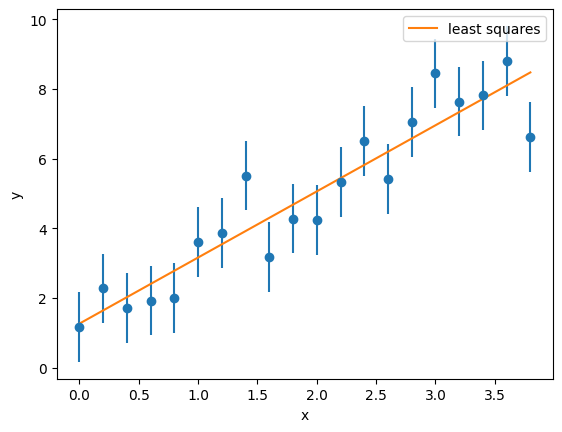

[2.17712929 1.18514876]


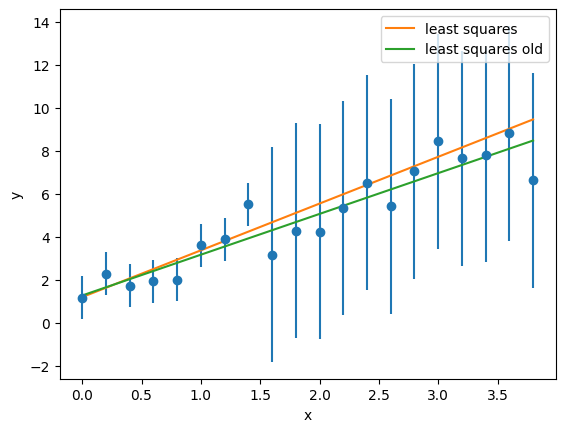

<Figure size 640x480 with 0 Axes>

In [ ]:
#let's add errors


yarray = numpy.array([1.16100793, 2.27070892+8.*0., 1.7102285 , 1.92216664 ,2.00306275 ,3.60437835,
 3.8682993 , 5.51139028, 3.16760897, 4.27715062, 4.22776111, 5.33520844,
 6.50611469, 5.4146256,  7.04786637, 8.44454962, 7.63848438, 7.81296952,
 8.80991074 ,6.62531274])#+numpy.random.normal(size=(20))*0.3

yarrayError = yarray*0.+1.

#optimum loss function now involves these error bars:

def loss3(coeff,xarray,yarray,yarrayError):
  loss3 = numpy.sum((yarray-f(xarray,coeff[0],coeff[1]))**2./(2.*yarrayError**2.))
  return loss3

print(loss3([1.,1.],xarray,yarray,yarrayError))

#from scipy.optimize import minimize

start = [1.,1.]

minimum = minimize(loss3,x0=start,args=(xarray,yarray,yarrayError),method='BFGS')
print(minimum.x)
pylab.errorbar(xarray,yarray,yarrayError,linestyle='None',marker='o')
pylab.plot(xarray,minimum.x[0]*xarray+minimum.x[1],label='least squares')
pylab.legend()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.show()
pylab.clf()
#if errors get large, the points are correspondingly downweighted

yarrayError[xarray>1.5] *= 5


minimum = minimize(loss3,x0=start,args=(xarray,yarray,yarrayError),method='BFGS')
print(minimum.x)
pylab.errorbar(xarray,yarray,yarrayError,linestyle='None',marker='o')
pylab.plot(xarray,minimum.x[0]*xarray+minimum.x[1],label='least squares')

pylab.plot(xarray,1.89827257*xarray+1.26122259,label='least squares old')
pylab.legend()
pylab.xlabel('x')
pylab.ylabel('y')
pylab.show()
pylab.clf()



# Bayesian Data Analysis

We now turn to Bayesian data analysis. Our original data vector now has errors. Write down a likelihood, a prior (you may assume it is just a constant for now), and evaluate it on a grid of slope $a$ and intercept $b$. Plot the 2D posterior.

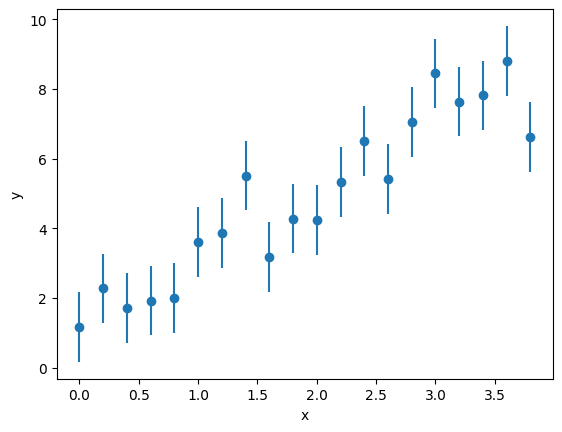

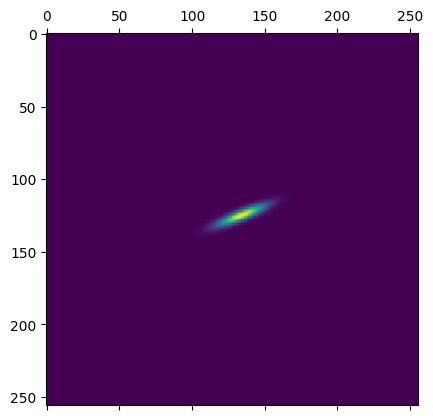

In [ ]:
#Bayesian version


xarray = numpy.arange(20.)/5

yarray = numpy.array([1.16100793, 2.27070892+8.*0., 1.7102285 , 1.92216664 ,2.00306275 ,3.60437835,
 3.8682993 , 5.51139028, 3.16760897, 4.27715062, 4.22776111, 5.33520844,
 6.50611469, 5.4146256,  7.04786637, 8.44454962, 7.63848438, 7.81296952,
 8.80991074 ,6.62531274])#+numpy.random.normal(size=(20))*0.3

yarrayError = yarray*0.+1.


pylab.errorbar(xarray,yarray,yarrayError,linestyle='None',marker='o')
#pylab.plot(xarray,aHat*xarray+bHat)
pylab.xlabel('x')
pylab.ylabel('y')


def loglikelihood(vals):
  loglike = numpy.sum(-(yarray-f(xarray,vals[0],vals[1]))**2./(2.*yarrayError**2.))
  return loglike

#print(loglikelihood(1,2))

def evaluate_on_grid(func, a_grid, b_grid):###from apw!!
    a_grid, b_grid = numpy.meshgrid(a_grid, b_grid)
    ab_grid = numpy.vstack((a_grid.ravel(), b_grid.ravel())).T

    func_vals = numpy.zeros(ab_grid.shape[0])
    for j, pars in enumerate(ab_grid):
        func_vals[j] = func(pars)

    return func_vals.reshape(a_grid.shape)

a_grid = numpy.linspace(-3.,7.,256)
b_grid = numpy.linspace(-4.,6.,256)

logongrid = evaluate_on_grid(loglikelihood,a_grid,b_grid)
ongrid = numpy.exp(logongrid)
p_a_marg = numpy.sum(ongrid,axis=0)
pylab.matshow(ongrid.T)

#print(bb)

In [ ]:
pylab.contourf(ongrid)
pylab.colorbar()

NameError: name 'pylab' is not defined

Now, derive the marginalized posterior probability for  𝑎  by integrating or summing the posterior over the  𝑏  axis. Plot your result. Repeat this for the posterior on  𝑏 .

(-1.0, 3.0)

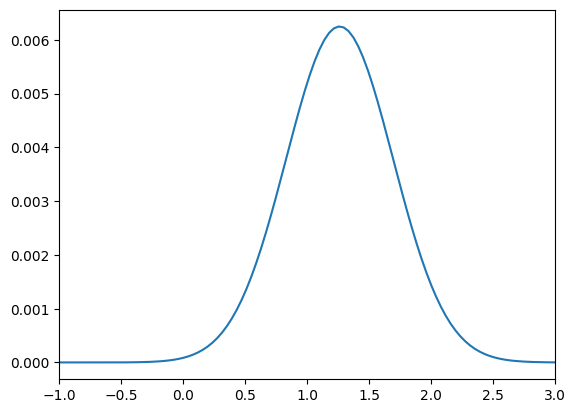

In [ ]:


p_b_marg = numpy.sum(ongrid,axis=1)
#pylab.matshow(ongrid)
pylab.clf()
pylab.plot(b_grid,p_b_marg)
pylab.xlim(-1,3)


(0.0, 4.0)

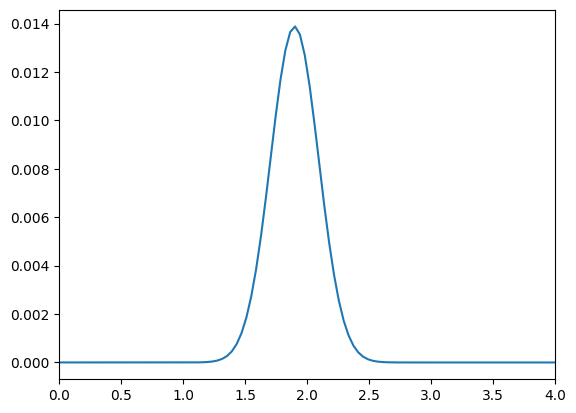

In [ ]:
pylab.clf()
pylab.plot(a_grid,p_a_marg)
pylab.xlim(0,4)

# Bayesian: more parameters


Repeat the above bayesian parameter analysis for the sinusoidal dataset and 3-parameter fit. Derive marginalized posteriors for $a$, $b$, and $c$.

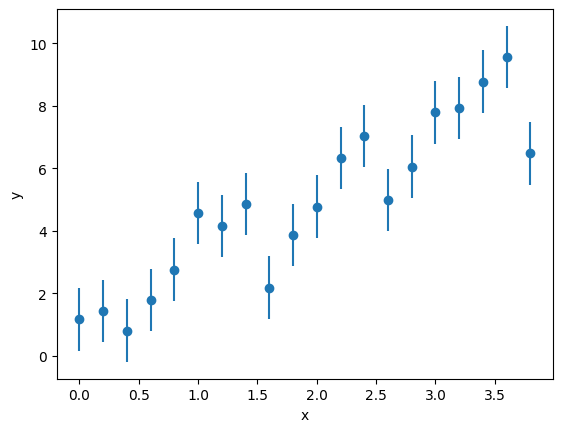

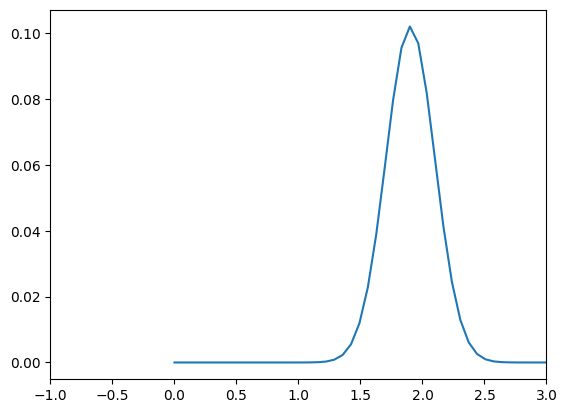

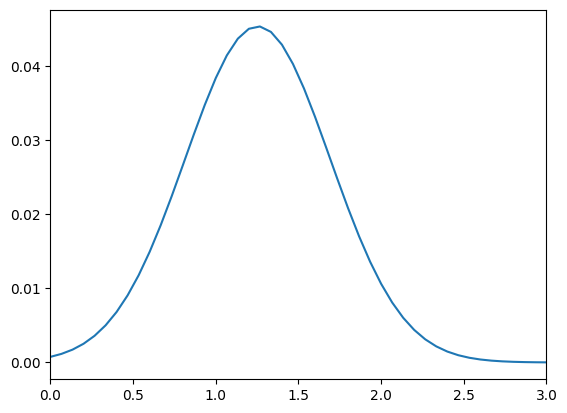

(-2.0, 0.0)

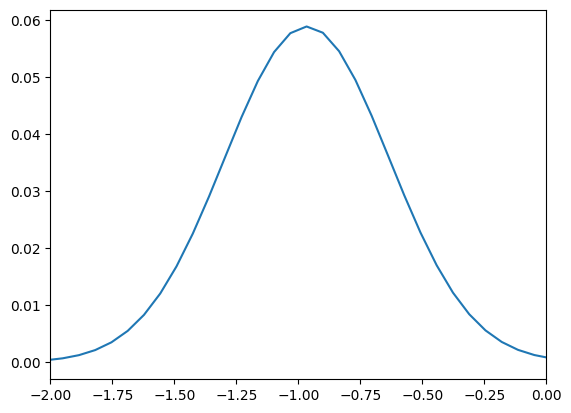

In [ ]:


def loglikelihood2(vals):
  loglike2 = numpy.sum(-(yarray-f2(xarray,vals[0],vals[1],vals[2]))**2./(2.*yarrayError**2.))
  return loglike2

def evaluate_on_grid2(func, a_grid, b_grid,c_grid):###from apw!!
    a_grid, b_grid, c_grid = numpy.meshgrid(a_grid, b_grid, c_grid)
    abc_grid = numpy.vstack((a_grid.ravel(), b_grid.ravel(), c_grid.ravel())).T
    func_vals = numpy.zeros(abc_grid.shape[0])
    for j, pars in enumerate(abc_grid):
        func_vals[j] = func(pars)

    return func_vals.reshape(a_grid.shape)



yarray = numpy.array([1.16100793, 2.27070892+8.*0., 1.7102285 , 1.92216664 ,2.00306275 ,3.60437835,
 3.8682993 , 5.51139028, 3.16760897, 4.27715062, 4.22776111, 5.33520844,
 6.50611469, 5.4146256,  7.04786637, 8.44454962, 7.63848438, 7.81296952,
 8.80991074 ,6.62531274])-1.*numpy.sin(5.*xarray)#+numpy.random.normal(size=(20))*0.3



a_grid = numpy.linspace(0.,4.,60)
b_grid = numpy.linspace(-1.,3.,61)
c_grid = numpy.linspace(-3.,1.,62)

logongrid2 = evaluate_on_grid2(loglikelihood2,a_grid,b_grid,c_grid)
ongrid2 = numpy.exp(logongrid2)


pylab.errorbar(xarray,yarray,yarrayError,linestyle='None',marker='o')
#pylab.plot(xarray,aHat*xarray+bHat)
pylab.xlabel('x')
pylab.ylabel('y')
pylab.show()

p_a_marg = numpy.sum(ongrid2,axis=(0,2))#numpy.sum(numpy.sum(ongrid2,axis=0),axis=1)

pylab.clf()
pylab.plot(a_grid,p_a_marg)
pylab.xlim(-1,3)
pylab.show()

pylab.clf()
p_b_marg = numpy.sum(ongrid2,axis=(1,2))#numpy.sum(numpy.sum(ongrid2,axis=1),axis=1)
#pylab.matshow(ongrid)
pylab.clf()
pylab.plot(b_grid,p_b_marg)
pylab.xlim(0,3)

pylab.show()

pylab.clf()
p_c_marg = numpy.sum(ongrid2,axis=(0,1))
pylab.plot(c_grid,p_c_marg)
pylab.xlim(-2,0)

In [ ]:
existing existing mcmc code  - more params.



distribution of predictions. relation

# MCMC


Now we will solve the same problem with a Markov Chain Monte Carlo method. If you have lots of time left, write your own Metropolis Hastings algorithm. Otherwise, examine and add comments explaining the code written below.

In [ ]:
def MCMC(parameters,stepnumber,logPosteriorFn,sigmas):
  chain = numpy.zeros((stepnumber,len(parameters)))
  logProb = numpy.zeros(stepnumber)
  chain[0] = parameters
  logProb[0] = logPosteriorFn(parameters)
  for i in range(1,stepnumber):
    diff = numpy.random.normal(sigmas)
    newParam = chain[i-1]+diff
    newValue = logPosteriorFn(newParam)
    logProbRatio = newValue - logPosteriorFn(chain[i-1])
    if (logProbRatio > 0) or (numpy.exp(logProbRatio) >  numpy.random.uniform()):
      chain[i] = newParam
      logProb[i] = newValue
    else:
      chain[i] = chain[i-1]
      logProb[i] = logProb[i-1]
  return chain, logProb




Now, run a chain as shown below. Plot the values of $a$ vs. the values of $b$ for the first 3000 steps in the chain. Why are the initial steps often excluded?

Generate and plot a histogram of the $a$ values in the chain. Comment on the significance / interpretation of this plot.



In [ ]:

parameters = numpy.array([1.,1.,1.])
stepnumber = 100000
sigmas = numpy.array([0.1,0.1,0.1])
chain, logProb = MCMC(parameters,stepnumber,loglikelihood2,sigmas)

chain
pylab.plot(chain[:3000, 1], chain[:3000, 2], marker="x",linestyle='-', linewidth=1.0)

counts, bins = numpy.histogram(chain[:,0])
pylab.hist(bins[:-1], bins, weights=counts)

NameError: name 'numpy' is not defined

You can also use the corner package to plot the posteriors. Explain what each panel of the plot is showing.

In [ ]:
!source activate statsseminar; pip install corner
import corner

/bin/bash: line 1: activate: No such file or directory


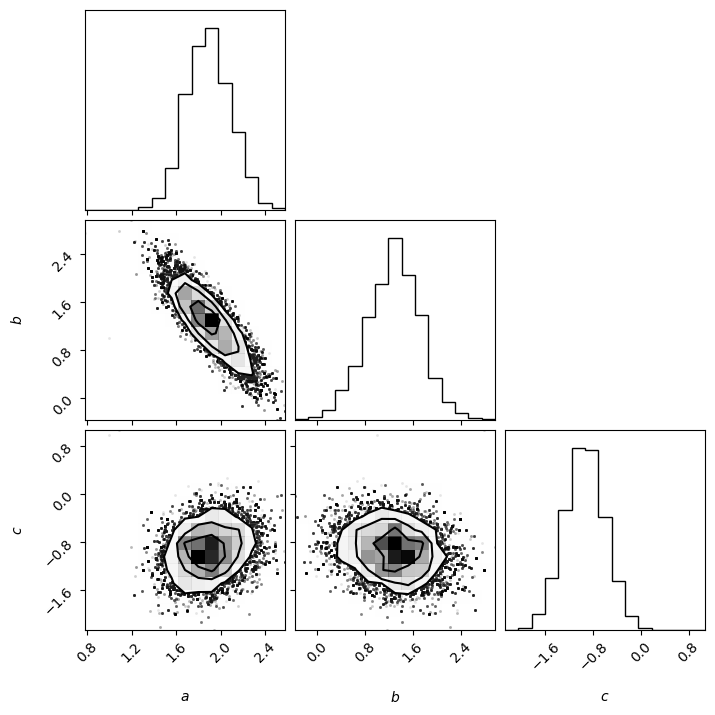

In [ ]:
fig = corner.corner(
    chain, bins=15, labels=["$a$", "$b$","$c$"]
)


# Examining the impact of priors

Now examine the impact of priors. Set a prior that imposes a lower bound on one of the parameters.  Then impose a prior such that $P(c) \propto e^{10 c}$. Examine the resulting posterior plots for each case.


In [ ]:
def logprior(vals):
  if vals[1]<1.:
    logprior= -1000000000
  else:
    logprior = 0.
  return logprior

def logprioraltaddition(vals):
 # if vals[2]>0.:
#  logprior= -1000000000
#  else:
  logprior = numpy.log(numpy.exp(10.*vals[2]))
  return logprior

def loglikelihood2(vals):
  loglike2 = numpy.sum(-(yarray-f2(xarray,vals[0],vals[1],vals[2]))**2./(2.*yarrayError**2.))
  return loglike2

def logposterior2(vals):
  logpost = loglikelihood2(vals)+logprior(vals)
  return logpost


def logposterior2alt(vals):
  logpost = loglikelihood2(vals)+logprior(vals)+logprioraltaddition(vals)
  return logpost

parameters = numpy.array([1.5,1.5,-1.5])
stepnumber = 100000
sigmas = numpy.array([0.1,0.1,0.1])
chainPriors, logProbPriors = MCMC(parameters,stepnumber,logposterior2,sigmas)
pylab.show()

parameters = numpy.array([1.5,1.5,-1.5])
stepnumber = 100000
sigmas = numpy.array([0.1,0.1,0.1])
chainPriorsAlt, logProbPriors = MCMC(parameters,stepnumber,logposterior2alt,sigmas)


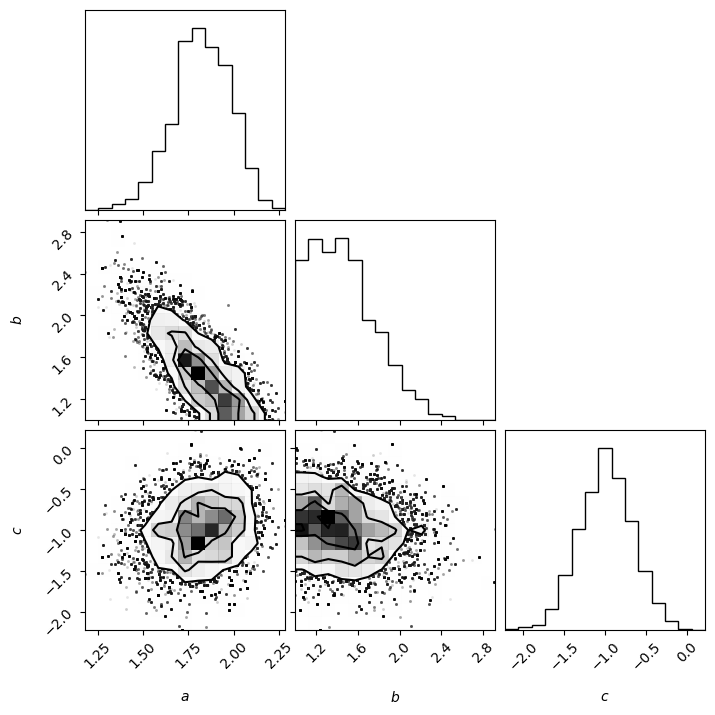

In [ ]:

fig = corner.corner(
    chainPriors, bins=15, labels=["$a$", "$b$","$c$"]
)

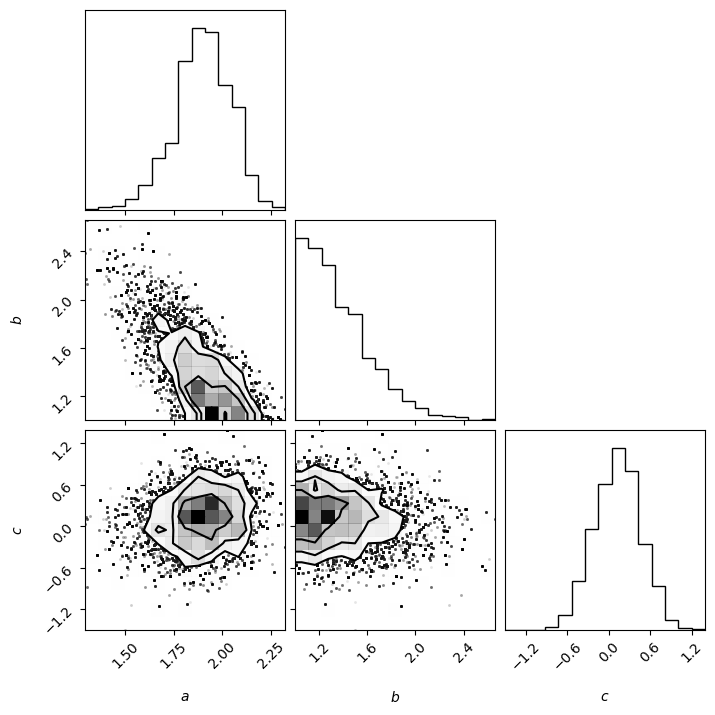

In [ ]:

fig = corner.corner(
    chainPriorsAlt, bins=15, labels=["$a$", "$b$","$c$"]
)